In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Read the data
df1 = pd.read_csv('../files/AirPassengers.csv')

In [4]:
df1.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# Chek data-type
df1.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
# We are proving input to tell pandas that we are trying to work with time series.
df1 = pd.read_csv('../files/AirPassengers.csv', parse_dates = ['Month'])

In [7]:
df1.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [8]:
# It is recommended that we make our time series reference as the index
df1 = pd.read_csv('../files/AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')

In [9]:
df1.dtypes

#Passengers    int64
dtype: object

In [10]:
# We can conveniently do slicing i.e. obtain data for a specific time period.
df1['1951-04-01': '1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [11]:
# We can check values corresponding to a specific time point 
df1.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

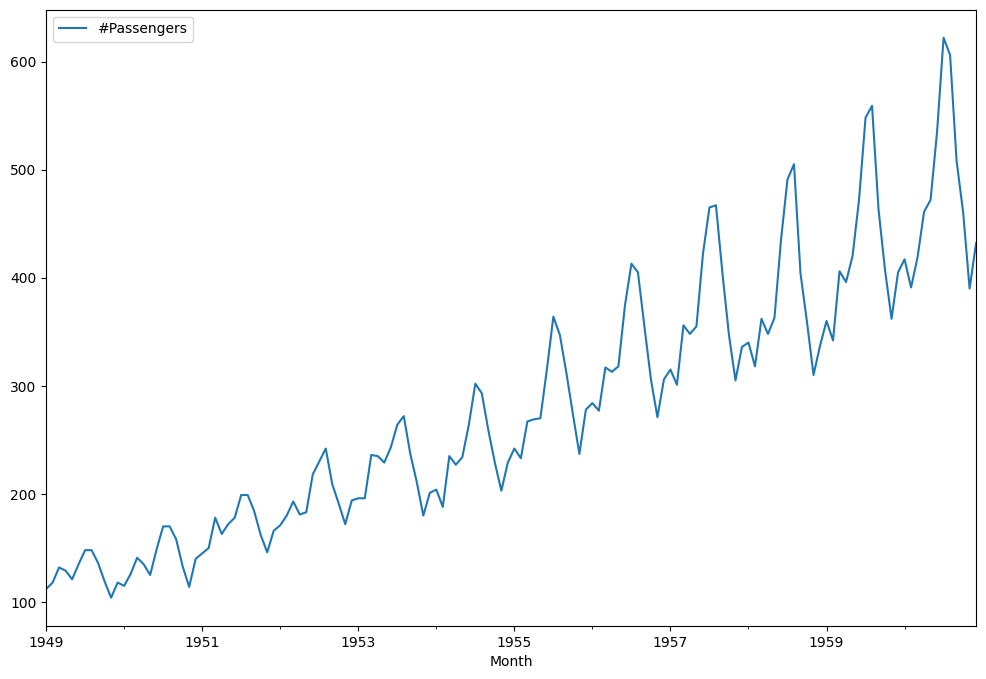

In [12]:
# Plot the time series
df1.plot()
plt.show()

In [1]:
# Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1.plot()
df1

NameError: name 'df1' is not defined

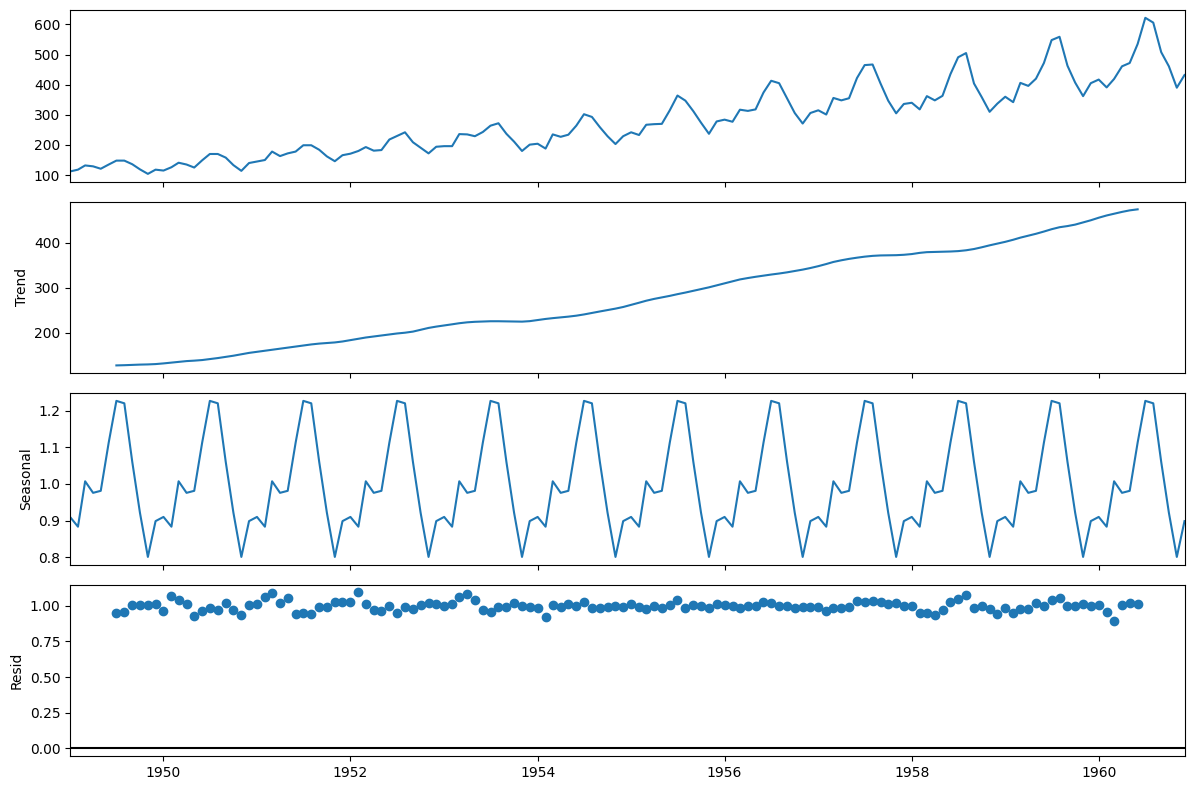

In [14]:
# Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [15]:
# Let's try to do log transformation
df1_log = df1.copy()

In [16]:
df1_log['Pax'] = np.log(df1)

In [17]:
df1_log.Pax

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

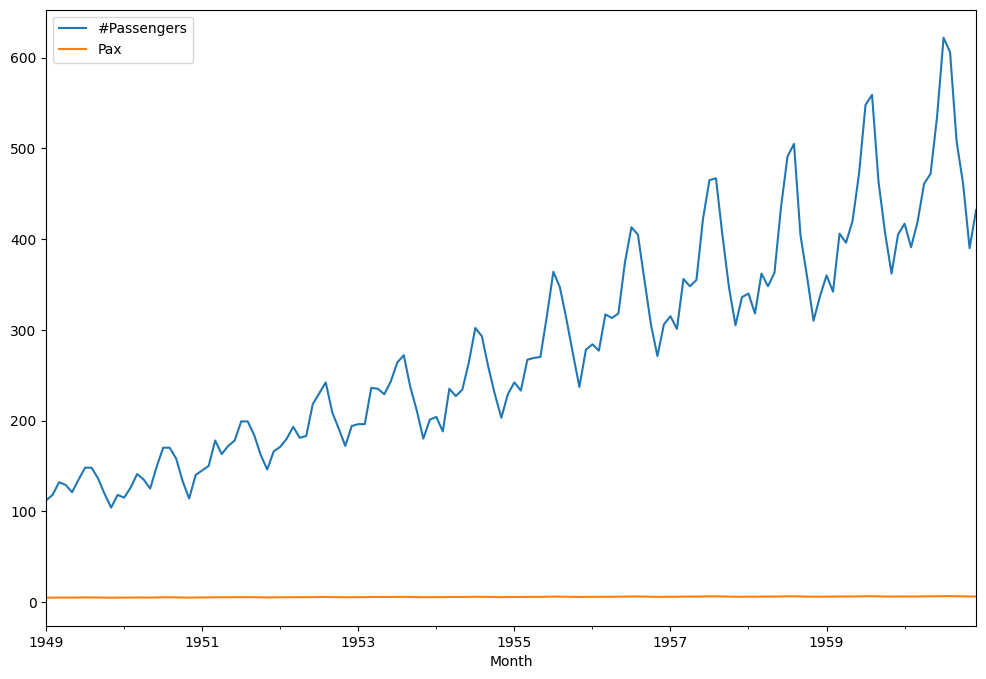

In [18]:
#Visualize the log transformed series
df1_log.plot()
plt.show()

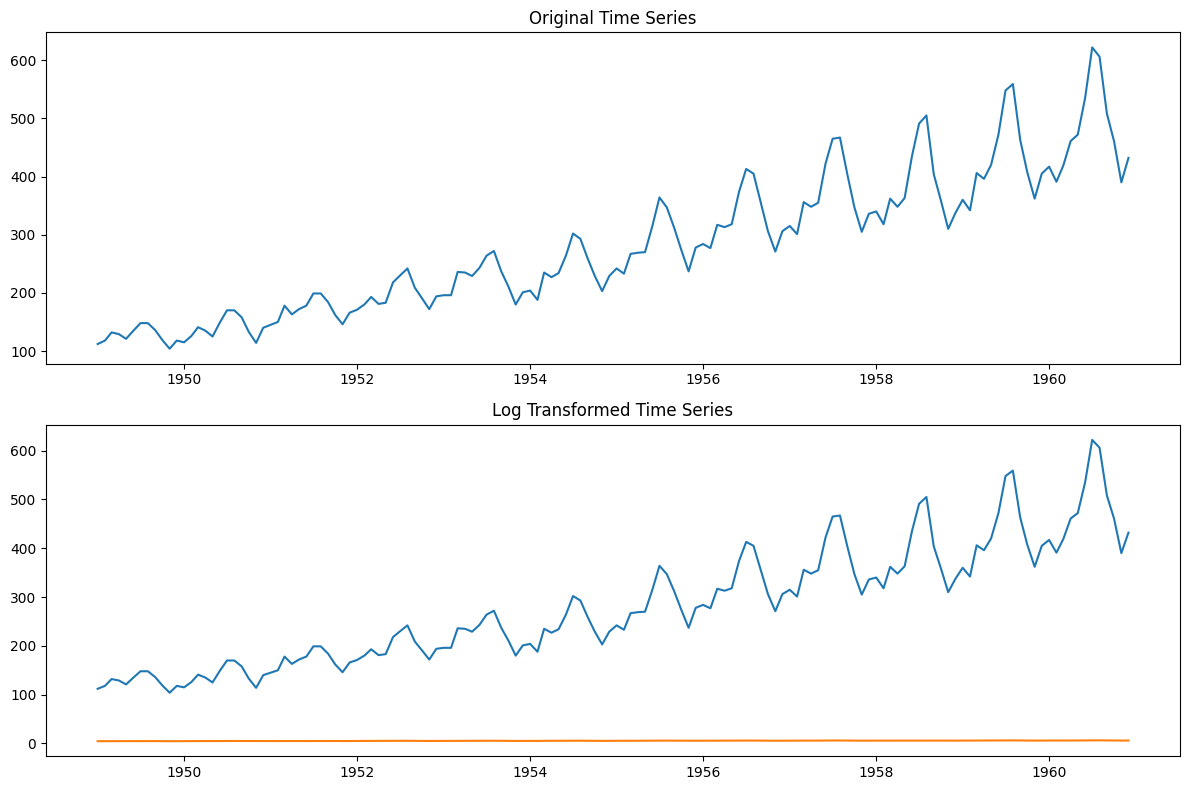

In [19]:
# Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()